In [6]:
print(__doc__)

Automatically created module for IPython interactive environment


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Load the boston dataset.
# Carga del dataset Boston.
boston = load_boston()
X, y = pd.DataFrame(
    boston['data'],
    columns=['a','b','c','d','e','f','g','h','i','j','k','l', 'm']), pd.Series(boston['target'])

X.shape, type(X), y.shape, type(y)

((506, 13), pandas.core.frame.DataFrame, (506,), pandas.core.series.Series)

In [8]:
X.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [11]:
# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
# Utilizamos el estimador base LassoCV ya que la norma L1 promueve la escasez de características.
clf = LassoCV(cv=10)

# Set a minimum threshold of 0.25
# Establecer un umbral mínimo de 0.25
sfm = SelectFromModel(clf, threshold=0.1)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]
n_features

5

In [19]:
print(dir(sfm))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_get_param_names', '_get_support_mask', 'estimator', 'estimator_', 'fit', 'fit_transform', 'get_params', 'get_support', 'inverse_transform', 'norm_order', 'partial_fit', 'prefit', 'set_params', 'threshold', 'threshold_', 'transform']


In [33]:
def var_relevants(sfm, X):
    bool_select_var = list(sfm.get_support())
    list_columns = list(X.columns)
    return list({
       list_columns[i]: bool_select_var[i] for i in range(len(list_columns)) if bool_select_var[i]
    }.keys())

In [35]:
var_relevants(sfm, X)

['f', 'h']

In [14]:
# Reset the threshold till the number of features equals two.
# Restablecer el umbral hasta que el número de características sea igual a dos.

# Note that the attribute can be set directly instead of repeatedly fitting the metatransformer.
# Tenga en cuenta que el atributo se puede establecer directamente en lugar de ajustarse repetidamente al metatransformador.

while n_features > 2:
    sfm.threshold += 0.1
    print(sfm.threshold)
    
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

0.35
0.44999999999999996
0.5499999999999999
0.6499999999999999
0.7499999999999999


In [17]:
X_transform

array([[6.575 , 4.09  ],
       [6.421 , 4.9671],
       [7.185 , 4.9671],
       ...,
       [6.976 , 2.1675],
       [6.794 , 2.3889],
       [6.03  , 2.505 ]])

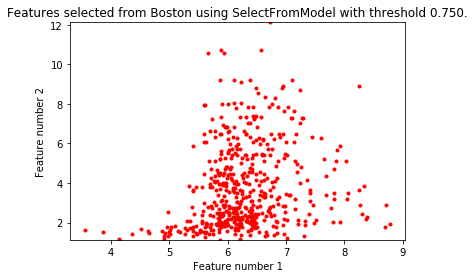

In [15]:
# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold
)

feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()